# <center> Social and Information Networks CSE3021

## <center> Co-occurence of Hash-Tags in Twitter

<left> Karthik Valmeekam (15BCE0175) <br> Rishab Jain (15BCE0308) <br> Siddharth Bhargava (15BCE0628) <br><br> Professor Annapurna J. <br> Slot A1 + TA1

### Introduction:

In this project, we study the cooccurence of hashtags over the Twitter social network. Specifically, we look at hashtags (i.e. nodes in the network) that cooccur with a particular hashtag in chronological order, their distribution over the network, and the presence/absence of edges between them.
We will generally refer to such chronological distribution as information propagation, where information, in our context, will refer to the other hashtags

In [1]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
import re

In [2]:
# Twitter App access keys for @user
# Consume:
CONSUMER_KEY    = '4glklFBMR5blxsr63Ywe7OrYR'
CONSUMER_SECRET = 's5c2zuAOmHS84k78yFIyyDMuyCXJx4Jgjv6qwSRT8VR4cAQl6G'

# Access:
ACCESS_TOKEN  = '1305461708-fXs7MLmqOHmHtTU77F1I6I318HuLtsvpFaXbeLq'
ACCESS_SECRET = 'vpJSD6cj4A173L2rj6peto1ph52npMGbNnRPxU5RNnQI0'

In [3]:
# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

    # We create an extractor object:
api = twitter_setup()

In [4]:
#Extracting hashtags and mentions from the tweets
def extract_hash_tags(text):
	return set([re.sub(r"(\W+)$", "", j) for j in set([i for i in text.split() if i.startswith("#")])])
def extract_mentions(text):
	return set([re.sub(r"(\W+)$", "", j) for j in set([i for i in text.split() if i.startswith("@")])])


In [5]:
#Getting the tweets
tweets = tweepy.Cursor(api.search, q='#giveaway', include_entities=True, lang="en").items(500)
a=[(tweet.text,tweet.created_at,tweet.retweet_count,tweet.user.screen_name) for tweet in tweets]                 

In [6]:
#Splitting the tuple
twetexts = [x[0] for x in a]
twedate = [x[1] for x in a]
tweret = [x[2] for x in a]
tweuse = [x[3] for x in a]

In [7]:
#Creating a Dataframe
data = pd.DataFrame(data=twetexts, columns=['Tweets'])
#Storing 
data['HashTags'] = np.array([(extract_hash_tags(i)) for i in data['Tweets']])
data['Mentions'] = np.array([(extract_mentions(i)) for i in data['Tweets']])
data['Date'] = np.array(twedate)
data['RTs']    = np.array(tweret)
data['User'] = np.array(tweuse)
data.sort_values(by='Date', ascending=0)

,Tweets,HashTags,Mentions,Date,RTs,User
0,RT @hellcasecom: 🔥Dream Case #Giveaway: \n\n ▪...,"{#Giveaway, #hellcase}",{@hellcasecom},2017-11-08 13:05:07,601,Renato_1206
2,RT @Abiphillips: @eatQuickr Hi guys &amp; welc...,"{#free, #FOLLOW, #thurs, #giveaway, #RT, #win,...","{@eatQuickr, @Google, @Abiphillips}",2017-11-08 13:05:07,6,Netroix
1,RT @NRGgg: NRG #Gaming Controller #Giveaway\n-...,"{#Gaming, #Giveaway}",{@NRGgg},2017-11-08 13:05:07,1703,Jiraiya54
3,RT @hellcasecom: 🔥Dream Case #Giveaway: \n\n ▪...,"{#Giveaway, #hellcase}",{@hellcasecom},2017-11-08 13:05:06,601,gustavobit
4,RT @Bloodyspasm: New #GiveAway! #DLC for #CODW...,"{#DLC, #CODWWII, #win, #GiveAway}",{@Bloodyspasm},2017-11-08 13:05:05,64,LeanneWakenshaw
5,"RT @selltocom: Follow us, RT, &amp; let us kno...","{#gaming, #competition, #PS4, #giveaway, #win,...",{@selltocom},2017-11-08 13:05:04,147,Rajavandrapu
6,RT @DrakeMoon: 10K💎+ ZAP AK47 #GIVEAWAY! 🔫\n\n...,{#GIVEAWAY},{@DrakeMoon},2017-11-08 13:05:04,502,isbilyu
7,Check Out This Contest From @Confront_Me https...,"{#Contest, #Sweepstakes, #Giveaway, #Confronta...",{@Confront_Me},2017-11-08 13:05:04,0,SaraBTakacs
8,RT @RegalMovies: FOLLOW us &amp; RT for a chan...,"{#OrientExpressMovie, #giveaway}",{@RegalMovies},2017-11-08 13:05:02,1492,mommy2rmta
9,RT @HykeS_Noel: Join giveaway guys! #Giveaway ...,{#Giveaway},{@HykeS_Noel},2017-11-08 13:05:02,1,075pablo


In [9]:
#Finding the co-occurences of all the hashtags
from collections import defaultdict
com = defaultdict(lambda : defaultdict(int))
for k in range(0,len(htlist)):    
    for i in range(len(htlist[k])-1):            
        for j in range(i+1, len(htlist[k])):
            w1, w2 = sorted([htlist[k][i], htlist[k][j]])                
            if w1 != w2:
                com[w1][w2] += 1

In [10]:
com['#giveaway']

defaultdict(int,
            {'#giveaways': 2,
             '#good': 1,
             '#health': 3,
             '#hotcakes': 3,
             '#humor': 1,
             '#hurry': 3,
             '#indiedev': 1,
             '#kids': 1,
             '#l': 1,
             '#music': 1,
             '#mysteryprize': 1,
             '#netflixbinge': 2,
             '#offer': 2,
             '#orlygift': 1,
             '#pair': 1,
             '#paypal': 1,
             '#perfectpout': 1,
             '#prize': 9,
             '#prizes': 1,
             '#psn': 1,
             '#pubg': 1,
             '#pubggiveaway': 1,
             '#pug': 1,
             '#res': 3,
             '#retweet': 7,
             '#skincare': 3,
             '#spa': 1,
             '#steam': 2,
             '#swag': 2,
             '#sweeps': 6,
             '#sweepstakes': 1,
             '#tbr': 1,
             '#tech': 1,
             '#technogenuine': 1,
             '#thurs': 1,
             '#toddlers': 1,
 

In [12]:
import operator
com_max = []
# For our term, look for the most common co-occurrent terms
for t1 in com:
    if(t1 == '#giveaway'):
        t1_max_terms = sorted(com[t1].items(), key=operator.itemgetter(1), reverse=True)[:10]
        for t2, t2_count in t1_max_terms:
            com_max.append(((t1, t2), t2_count))

In [13]:
# Get the most frequent co-occurrences
terms_max = sorted(com_max, key=operator.itemgetter(1), reverse=True)
terms_max

[(('#giveaway', '#win'), 77),
 (('#giveaway', '#xboxone'), 13),
 (('#giveaway', '#winitwednesday'), 10),
 (('#giveaway', '#prize'), 9),
 (('#giveaway', '#retweet'), 7),
 (('#giveaway', '#sweeps'), 6),
 (('#giveaway', '#unicorn'), 5),
 (('#giveaway', '#skincare'), 3),
 (('#giveaway', '#res'), 3),
 (('#giveaway', '#hotcakes'), 3)]

In [31]:
taglist = []
tagdist = []
tags = ['#giveaway']
tagdict = com['#giveaway']
for key, value in tagdict.items():
    temp = ['#giveaway',key,value]
    taglist.append(temp)
    temp=value
    tagdist.append(temp)
    temp = key
    tags.append(temp)
taglist

[['#giveaway', '#thurs', 1],
 ['#giveaway', '#win', 77],
 ['#giveaway', '#xboxone', 13],
 ['#giveaway', '#music', 1],
 ['#giveaway', '#pair', 1],
 ['#giveaway', '#wireless', 1],
 ['#giveaway', '#sweeps', 6],
 ['#giveaway', '#winitwednesday', 10],
 ['#giveaway', '#prize', 9],
 ['#giveaway', '#skincare', 3],
 ['#giveaway', '#res', 3],
 ['#giveaway', '#hotcakes', 3],
 ['#giveaway', '#hurry', 3],
 ['#giveaway', '#unicorns', 1],
 ['#giveaway', '#vapeon', 1],
 ['#giveaway', '#swag', 2],
 ['#giveaway', '#unicorn', 5],
 ['#giveaway', '#health', 3],
 ['#giveaway', '#technogenuine', 1],
 ['#giveaway', '#psn', 1],
 ['#giveaway', '#steam', 2],
 ['#giveaway', '#paypal', 1],
 ['#giveaway', '#tech', 1],
 ['#giveaway', '#toddlers', 1],
 ['#giveaway', '#retweet', 7],
 ['#giveaway', '#offer', 2],
 ['#giveaway', '#tuesday', 3],
 ['#giveaway', '#pug', 1],
 ['#giveaway', '#trial', 1],
 ['#giveaway', '#weightloss', 1],
 ['#giveaway', '#kids', 1],
 ['#giveaway', '#weightl', 1],
 ['#giveaway', '#orlygift', 1]

In [32]:
tagdist

[1,
 77,
 13,
 1,
 1,
 1,
 6,
 10,
 9,
 3,
 3,
 3,
 3,
 1,
 1,
 2,
 5,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 7,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 1]

In [33]:
tags

['#giveaway',
 '#thurs',
 '#win',
 '#xboxone',
 '#music',
 '#pair',
 '#wireless',
 '#sweeps',
 '#winitwednesday',
 '#prize',
 '#skincare',
 '#res',
 '#hotcakes',
 '#hurry',
 '#unicorns',
 '#vapeon',
 '#swag',
 '#unicorn',
 '#health',
 '#technogenuine',
 '#psn',
 '#steam',
 '#paypal',
 '#tech',
 '#toddlers',
 '#retweet',
 '#offer',
 '#tuesday',
 '#pug',
 '#trial',
 '#weightloss',
 '#kids',
 '#weightl',
 '#orlygift',
 '#indiedev',
 '#mysteryprize',
 '#netflixbinge',
 '#weekend',
 '#spa',
 '#humor',
 '#tbr',
 '#sweepstakes',
 '#vape',
 '#prizes',
 '#pubggiveaway',
 '#pubg',
 '#wednesdaymorning',
 '#winner',
 '#perfectpout',
 '#travel',
 '#ttot',
 '#ukbloggers',
 '#good',
 '#giveaways',
 '#l']

## Visualization of the co-occuring Hashtags:

### Social Network Analysis with Python and NetworkX

Social Network Analysis with Python and NetworkX

Social Network Analysis (SNA) has a wide applicability in many scientific fields and industries. This workshop is a gentle introduction to SNA using Python and NetworkX, a powerful and mature python library for the study of the structure, dynamics, and functions of complex networks.

### Creating and Manipulating Graphs using NetworkX 
NetworkX is a python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [34]:
# For plotting and visualization
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
G = nx.DiGraph()
G.add_nodes_from(tags)
#pos=nx.spring_layout(G,k=0.15,iterations=20)

In [70]:
G.add_weighted_edges_from(taglist)

C:\Users\Karthik\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Karthik\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Karthik\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


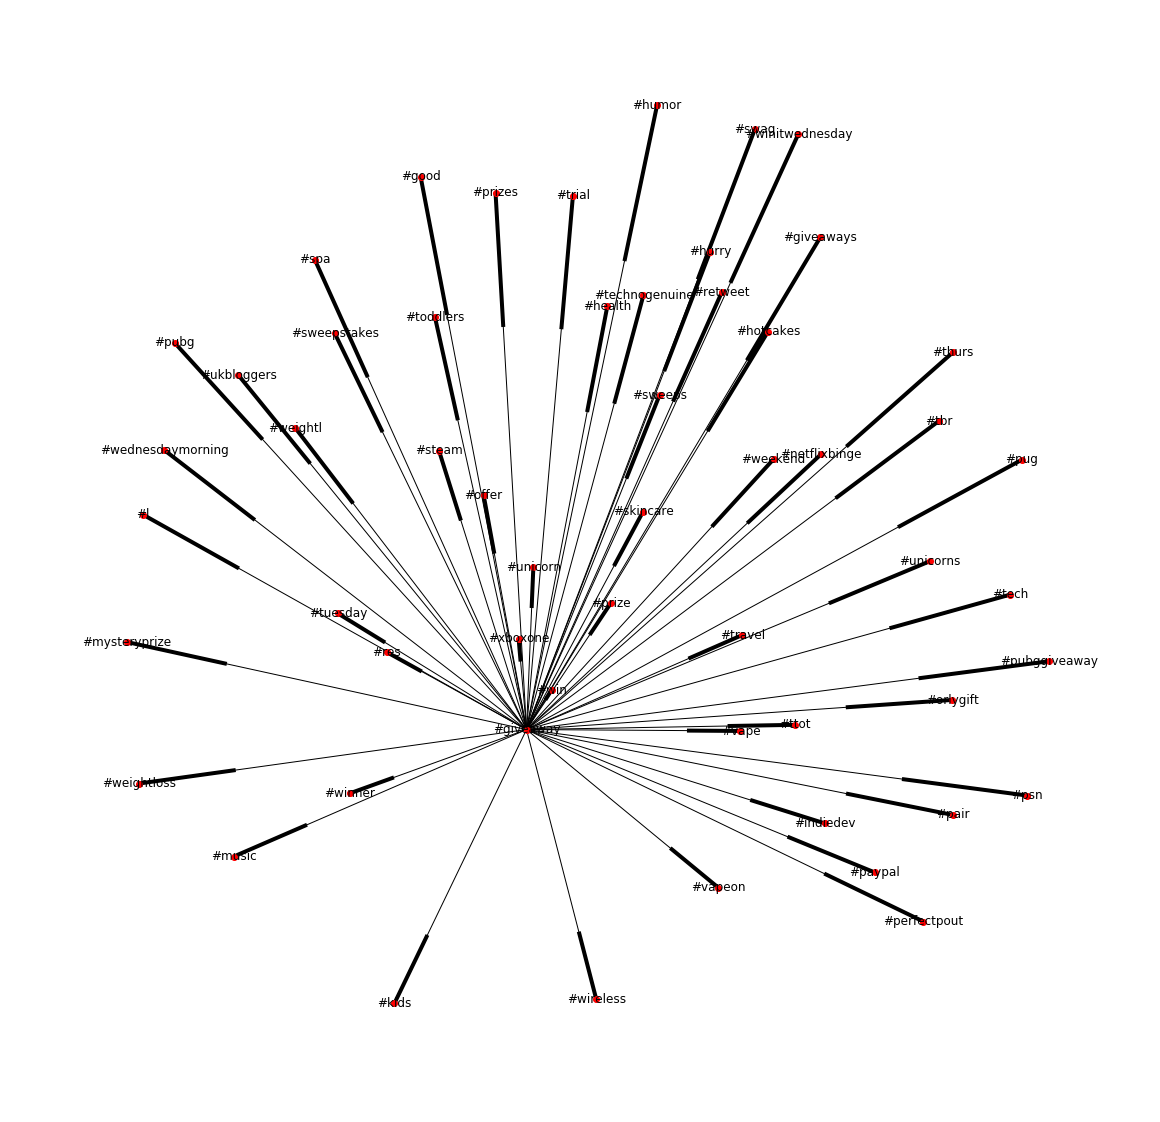

In [64]:
plt.figure(figsize=(20,20))
plt.axis("off")
nx.draw_networkx(G, node_size=36, with_labels=True)
plt.show()

C:\Users\Karthik\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Karthik\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Karthik\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


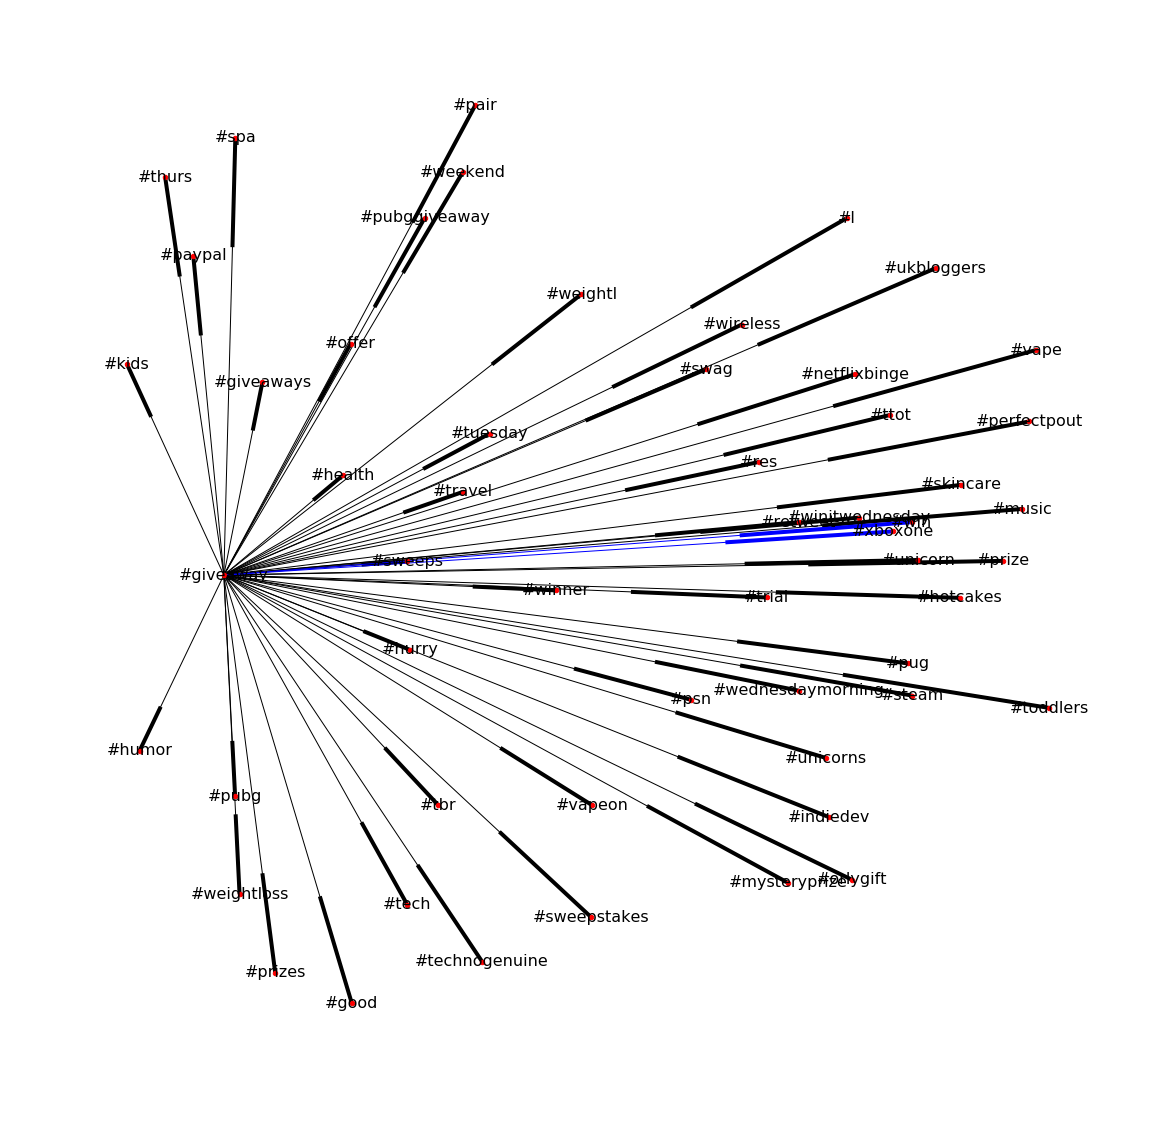

In [81]:
elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >10]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=10]

pos=nx.spring_layout(G) # positions for all nodes
# nodes
plt.figure(figsize=(20,20))
plt.axis('off')
nx.draw_networkx_nodes(G,pos,node_size=20)

# edges
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=1)
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=1,edge_color='b')

# labels
nx.draw_networkx_labels(G,pos,font_size=16,font_family='sans-serif')



plt.show() # display